# PEC 2. Introducción a los sistemas de recuperación de información.

En esta PEC vamos a desarrollar un sistema de recuperación de información básico. Partiendo de una lista de documentos de texto tendrás que usar las técnicas de recuperación de información vistas en la asignatura para obtener, procesar y analizar datos útiles a partir del contenido.




```
#TODO: nombre y apellidos
```







---

# **Parte 1**. Tareas básicas



Además de las ya clásicas `pandas` y `numpy`, vamos a utilizar la librería [NTLK](https://es.wikipedia.org/wiki/NLTK) (Natural Language Toolkit), una librería Python utilizada para analizar texto y aprendizaje automático.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 1.1 Separando las palabras (Tokenization)

El significado de cada sentencia se obtiene de las palabra que contiene. Así que analizando las palabras presentes en un texto se puede interpretar el significado. Así que lo primero que hay que hacer para poder tratar el texto es separar las palabras que lo componen, es decir, hacer una lista  de palabras. El modelo que vamos a utilizar aquí se denomina [**bolsa-de-palabras**](https://es.wikipedia.org/wiki/Modelo_bolsa_de_palabras) (bag-of-words) ya que nos interesan las palabras sin importar su posición o importancia en el documento.


La separación de las palabres o tokenization consiste en separar el texto en palabras, también denominados tokens. Generalmente el `espacio`se utiliza para separar palabras y elementos como los puntos, comas, dos puntos, etc. se utilizan para separar sentencias.




Hay multiples formas de realizar la separación de palabras para un texto dado. 

### 1.1.1 Funciones de Python

Se puede usar la función `split()` para separar una cadena de texto en una lista de palabras. Por defecto `split()` utiliza el espacio en blanco, aunque se puede usar cualquier caracter.


In [14]:
text01 = "Children shouldn't drink a sugary drink before bed."
text01.split(' ')

['Children', "shouldn't", 'drink', 'a', 'sugary', 'drink', 'before', 'bed.']

El método `split()` de Python no considera los signos de puntuación como elementos separados.



### 1.1.2 Expresiones regulares

El módulo `re` ofrece un conjunto de funciones para buscar coincidencias en una cadena de texto. Una *expresión regular* es una secuencia de caracteres que definen un patrón de búsqueda.

In [15]:
import re

text02 = """There are multiple ways we can perform tokenization on given text data. We can choose any method based on language, library and purpose of modeling."""
tokens = re.findall("[\w]+", text02) # TODO: usar una expresión regular para separar las palabras
print(tokens)

['There', 'are', 'multiple', 'ways', 'we', 'can', 'perform', 'tokenization', 'on', 'given', 'text', 'data', 'We', 'can', 'choose', 'any', 'method', 'based', 'on', 'language', 'library', 'and', 'purpose', 'of', 'modeling']


### 1.1.3 Con NLTK

Natural Language Toolkit (NLTK) tiene la función `word_tokenize()` para separación de palabras y `sent_tokenize()` para separación de sentencias.



In [16]:
from nltk.tokenize import sent_tokenize, word_tokenize

text03 = "<p>This is the first sentence. A gallon-of-milk in the U.S. costs $2.99. Is this the third sentence? Yes, it is!</p>"

for sent in sent_tokenize(text03): # TODO: separar las sentencias 
  print (word_tokenize (sent)) # TODO: separar las palabras  

['<', 'p', '>', 'This', 'is', 'the', 'first', 'sentence', '.']
['A', 'gallon-of-milk', 'in', 'the', 'U.S.', 'costs', '$', '2.99', '.']
['Is', 'this', 'the', 'third', 'sentence', '?']
['Yes', ',', 'it', 'is', '!', '<', '/p', '>']


## 1.2. Eliminación de números y símbolos. Conversión a minúsculas.

Como se puede comprobar, `word_tokenizer()` mantiene los signos de puntuación así como los los números y otros símbolos.

Una estrategia para reducir el número de palabras/tokens es convertirlas a minúsculas, pues algunos signos de puntuación modifican la letra inicial de las palabras. Así se consigue reducir el número de variantes de una misma palabra.




In [17]:
import string

def remove_tags (s):
  p =  re.compile(r'<.*?>') # TODO: eliminar tags html
  return p.sub('-', s)

# TODO : eliminar tags, tokenizar, convertir a minúsculas y eliminar símbolos no alfabéticos y números 
def tokenize_and_remove_punctuations(s):
    s = remove_tags(s)
    ss = s.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    ss = ''.join([i for i in ss if not i.isdigit()])
    return nltk.word_tokenize( ss.lower() )

print ((tokenize_and_remove_punctuations (text03))) 

['this', 'is', 'the', 'first', 'sentence', 'a', 'gallon', 'of', 'milk', 'in', 'the', 'u', 's', 'costs', 'is', 'this', 'the', 'third', 'sentence', 'yes', 'it', 'is']


## 1.3. Palabras vacías

Las *palabras vacías* (stopwords) son palabras más comunes en cualquier lenguaje, tienen sentido gramatical pero con poco significado para el análisis de un texto. Estas palabras vacías se incluyen artículos, preposiciones, conjunciones, pronombres, etc. así que su eliminación reduce considerablemente el número de palabras.

NLTK tiene listas de palabras vacías en 16 idiomas. En este caso, se ha cargado la lista en inglés.



In [18]:
# TODO : dada una lista de tokens, suprimir aquellos que sean palabras vacías o que su longitud es menor o igual 2


def remove_stop_words(tokens):
    stopwords = nltk.corpus.stopwords.words('english')
    filtered_words = [token for token in tokens if token not in stopwords and len(token) > 2] # TODO
    return filtered_words


len (remove_stop_words ( tokenize_and_remove_punctuations (text03)  ) ) == 8

True

## 1.4. Normalización

Muchos idiomas contienen palabras derivadas de otras y esto se denomina [flexión](https://es.wikipedia.org/wiki/Flexi%C3%B3n_(ling%C3%BC%C3%ADstica)). La flexión es la modificación de una para expresar diferentes categorías gramaticales como persona, número, género, etc.

Tratar esta flexión para llevar las palabras a una forma base se denomina **normalización de palabras**. La normalización permite que si se busca por una palabra se haga al mismo tiempo por todas sus flexiones.

La **lematización** es el proceso de reducir la inflexión de las palabras para llevarla a su forma origen o raíz. El lema es la parte de la palabra a la que se añade la flexión.

En NLTK hay disponibles diferentes lematizadores aunque aquí vamos a utilizar el más conocido: [algoritmo de Porter](https://es.wikipedia.org/wiki/Algoritmo_de_Porter). 


Podéis ver algo más de estos procesos en 
https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

In [19]:

from nltk.stem import PorterStemmer

def stem_words(tokens):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(token) for token in tokens] # TODO : obtener la versión básica de todos los tokens
    return stemmed_words


stem_words ( remove_stop_words(tokenize_and_remove_punctuations (text03)) )

['first', 'sentenc', 'gallon', 'milk', 'cost', 'third', 'sentenc', 'ye']

Una vez que ya están realizadas las operaciones básicas sobre el texto, es momento de ponerlo todo junto en la función `preprocess_data ()` que recibe un array de pares `(documentId, text)` y aplica las transformaciones anteriormente descritas.

In [20]:
def preprocess_text ( text , stem=True):
    tokens = tokenize_and_remove_punctuations(text)       # TODO
    filtered_tokens = remove_stop_words(tokens)           # TODO
    if stem :
      stemmed_tokens = stem_words(filtered_tokens)          # TODO
    else:
      stemmed_tokens = filtered_tokens
    return stemmed_tokens

def preprocess_data(contents, stem=True):
    dataDict = {}
    for content in contents:
        dataDict[content[0]] = preprocess_text(content[1], stem)
    return dataDict


In [21]:
document_1 = "I love watching movies when it's cold outside ;-)"
document_2 = "Toy Story is the best animation movie ever, I love it!"
document_3 = "Watching horror movies alone at night is really scary"
document_4 = "He loves to watch films filled with suspense and unexpected plot twists"
document_5 = "My mom loves to watch movies. My dad hates movie theaters. My brothers like any kind of movie. And I haven't watched a single movie since I got into college"
documents = [document_1, document_2, document_3, document_4, document_5]

docIds = ['doc01','doc02','doc03','doc04','doc05']

documents_list = list ( zip (docIds, documents ) ) # TODO : generar una lista de la forma  [('doc01', 'I love..'), ... ]


data_docs = preprocess_data (documents_list) # TODO : preprocesar la lista de documentos de ejemplo
data_docs

{'doc01': ['love', 'watch', 'movi', 'cold', 'outsid'],
 'doc02': ['toy', 'stori', 'best', 'anim', 'movi', 'ever', 'love'],
 'doc03': ['watch', 'horror', 'movi', 'alon', 'night', 'realli', 'scari'],
 'doc04': ['love',
  'watch',
  'film',
  'fill',
  'suspens',
  'unexpect',
  'plot',
  'twist'],
 'doc05': ['mom',
  'love',
  'watch',
  'movi',
  'dad',
  'hate',
  'movi',
  'theater',
  'brother',
  'like',
  'kind',
  'movi',
  'watch',
  'singl',
  'movi',
  'sinc',
  'got',
  'colleg']}

## 1.5. Frecuencia de las palabras


Ahora vamos a ver cómo de importante es una palabra/token en los documentos. 

Lo primero que hay que hacer es obtener un vocabulario que no es más que la lista de todos los tokens únicos que aparecen en todos los documentos.



In [22]:
def get_vocabulary(data):
    tokens = []
    for token_list in data.values():
        tokens = tokens + token_list # TODO
    fdist = nltk.FreqDist(tokens) # TODO
    return list(fdist.keys())

get_vocabulary ( data_docs)

['love',
 'watch',
 'movi',
 'cold',
 'outsid',
 'toy',
 'stori',
 'best',
 'anim',
 'ever',
 'horror',
 'alon',
 'night',
 'realli',
 'scari',
 'film',
 'fill',
 'suspens',
 'unexpect',
 'plot',
 'twist',
 'mom',
 'dad',
 'hate',
 'theater',
 'brother',
 'like',
 'kind',
 'singl',
 'sinc',
 'got',
 'colleg']

Para ello podemos calcular la frecuencia de cada término contando el número de veces que aparece en cada documento, que será una medida de su peso o importancia.

$TF (t,d) = f_{t,d}$  (#número de repeticiones del término $t$ en el documento $d$)

In [23]:
from nltk.probability import FreqDist

def calculate_tf(tokens):
    tf_score = {}
    for token in tokens:
        tf_score[token] = tokens.count(token) # TODO: calcular tf
    
    return tf_score


fdist = calculate_tf ( data_docs['doc05'])

fdist

{'brother': 1,
 'colleg': 1,
 'dad': 1,
 'got': 1,
 'hate': 1,
 'kind': 1,
 'like': 1,
 'love': 1,
 'mom': 1,
 'movi': 4,
 'sinc': 1,
 'singl': 1,
 'theater': 1,
 'watch': 2}

La **frecuencia inversa de documentos** para un término $t$ es el logaritmo (en este caso en base 2) del cociente entre el número de documentos y el número de documentos en los que aparece el término $t$.


$ IDF (t) = log_{2} \frac{N}{\{d \in D : t \in d \}} $

A mayor puntuación de TF*IDF el término es más específico y a menor puntuación, más genérico.

In [24]:
import math 

def calculate_idf(data):
    idf_score = {}
    N = len(data) # TODO: número de documentos
    all_words = get_vocabulary(data) # TODO: obtener el vocabulario
    for word in all_words:
        word_count = 0
        for token_list in data.values():
            if word in token_list:                  # TODO
                word_count += 1                     # TODO
        idf_score[word] = math.log2(N/word_count)   # TODO: calcular idf
    return idf_score
  

idf_score = calculate_idf ( data_docs )
idf_score

{'alon': 2.321928094887362,
 'anim': 2.321928094887362,
 'best': 2.321928094887362,
 'brother': 2.321928094887362,
 'cold': 2.321928094887362,
 'colleg': 2.321928094887362,
 'dad': 2.321928094887362,
 'ever': 2.321928094887362,
 'fill': 2.321928094887362,
 'film': 2.321928094887362,
 'got': 2.321928094887362,
 'hate': 2.321928094887362,
 'horror': 2.321928094887362,
 'kind': 2.321928094887362,
 'like': 2.321928094887362,
 'love': 0.32192809488736235,
 'mom': 2.321928094887362,
 'movi': 0.32192809488736235,
 'night': 2.321928094887362,
 'outsid': 2.321928094887362,
 'plot': 2.321928094887362,
 'realli': 2.321928094887362,
 'scari': 2.321928094887362,
 'sinc': 2.321928094887362,
 'singl': 2.321928094887362,
 'stori': 2.321928094887362,
 'suspens': 2.321928094887362,
 'theater': 2.321928094887362,
 'toy': 2.321928094887362,
 'twist': 2.321928094887362,
 'unexpect': 2.321928094887362,
 'watch': 0.32192809488736235}

In [25]:
def calculate_tfidf(data, idf_score):
    scores = {}
    for key,value in data.items():
        scores[key] = calculate_tf(value) # TODO: calcular tf
    for doc,tf_scores in scores.items():       # TODO
        for token, score in tf_scores.items(): # TODO
            tf = score                         # TODO
            idf = idf_score[token]             # TODO
            tf_scores[token] = tf * idf        # TODO: calcular tf*idf
    return scores


tfidf_score = calculate_tfidf ( data_docs, idf_score)
tfidf_score

{'doc01': {'cold': 2.321928094887362,
  'love': 0.32192809488736235,
  'movi': 0.32192809488736235,
  'outsid': 2.321928094887362,
  'watch': 0.32192809488736235},
 'doc02': {'anim': 2.321928094887362,
  'best': 2.321928094887362,
  'ever': 2.321928094887362,
  'love': 0.32192809488736235,
  'movi': 0.32192809488736235,
  'stori': 2.321928094887362,
  'toy': 2.321928094887362},
 'doc03': {'alon': 2.321928094887362,
  'horror': 2.321928094887362,
  'movi': 0.32192809488736235,
  'night': 2.321928094887362,
  'realli': 2.321928094887362,
  'scari': 2.321928094887362,
  'watch': 0.32192809488736235},
 'doc04': {'fill': 2.321928094887362,
  'film': 2.321928094887362,
  'love': 0.32192809488736235,
  'plot': 2.321928094887362,
  'suspens': 2.321928094887362,
  'twist': 2.321928094887362,
  'unexpect': 2.321928094887362,
  'watch': 0.32192809488736235},
 'doc05': {'brother': 2.321928094887362,
  'colleg': 2.321928094887362,
  'dad': 2.321928094887362,
  'got': 2.321928094887362,
  'hate': 2.

## 1.6. Generar el espacio vectorial

Usando las funciones anteriores vamos a construir la matriz de documentos (en filas) y términos (en columnas). Para facilitar la tarea usaremos una estructura de datos ya conocida, el **dataframe**.


In [ ]:
import pandas as pd

def generate_dataframe ( data ):
  all_words = get_vocabulary(data)  # TODO : obtener el vocabulario
  idf_score = calculate_idf (data)  # TODO : calcular idf
  tf_idf_score = calculate_tfidf ( data , idf_score) # TODO : calcular if*idf

  table = []
  for doc in tf_idf_score.keys():  # TODO : recorrer todas las frecuecias de los documentos
      d = dict.fromkeys(all_words , 0.0)  # TODO
      
      for wf in  tf_idf_score[doc]:       # TODO 
        d[wf] = tf_idf_score[doc][wf]     # TODO
 
      table.append(d)                     # TODO

  df = pd.DataFrame ( table , index = tf_idf_score.keys())
  return df

df_data = generate_dataframe (data_docs)

df_data.head(5)


,love,watch,movi,cold,outsid,toy,stori,best,anim,ever,horror,alon,night,realli,scari,film,fill,suspens,unexpect,plot,twist,mom,dad,hate,theater,brother,like,kind,singl,sinc,got,colleg
doc01,0.321928,0.321928,0.321928,2.321928,2.321928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc02,0.321928,0.000000,0.321928,0.000000,0.000000,2.321928,2.321928,2.321928,2.321928,2.321928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc03,0.000000,0.321928,0.321928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.321928,2.321928,2.321928,2.321928,2.321928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc04,0.321928,0.321928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.321928,2.321928,2.321928,2.321928,2.321928,2.321928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
doc05,0.321928,0.643856,1.287712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.321928,2.321928,2.321928,2.321928,2.321928,2.321928,2.321928,2.321928,2.321928,2.321928,2.321928


## 1.7. Generar el índice invertido

De manera similar, vamos a generar un índice invertido que almacenaremos en una estructura de datos Python: el **diccionario**.




In [ ]:
def generate_inverted_index(data):

    all_words = get_vocabulary(data)    # TODO : obtener el vocabulario
    idf_score = calculate_idf (data)    # TODO : calcular idf
    tf_idf_score = calculate_tfidf ( data , idf_score) # TODO : calcular if*idf

    index = {}
    for word in all_words:
        for doc, tokens in data.items():    # TODO 
            if word in tokens :             # TODO
                if word in index.keys():    # TODO 
                    index[word].append((doc, tf_idf_score[doc][word]) )  # TODO
                else:                                                    # TODO
                    index[word] = [ (doc, tf_idf_score[doc][word])]      # TODO 
    return index

inverted_index = generate_inverted_index (data_docs)

inverted_index

{'alon': [('doc03', 2.321928094887362)],
 'anim': [('doc02', 2.321928094887362)],
 'best': [('doc02', 2.321928094887362)],
 'brother': [('doc05', 2.321928094887362)],
 'cold': [('doc01', 2.321928094887362)],
 'colleg': [('doc05', 2.321928094887362)],
 'dad': [('doc05', 2.321928094887362)],
 'ever': [('doc02', 2.321928094887362)],
 'fill': [('doc04', 2.321928094887362)],
 'film': [('doc04', 2.321928094887362)],
 'got': [('doc05', 2.321928094887362)],
 'hate': [('doc05', 2.321928094887362)],
 'horror': [('doc03', 2.321928094887362)],
 'kind': [('doc05', 2.321928094887362)],
 'like': [('doc05', 2.321928094887362)],
 'love': [('doc01', 0.32192809488736235),
  ('doc02', 0.32192809488736235),
  ('doc04', 0.32192809488736235),
  ('doc05', 0.32192809488736235)],
 'mom': [('doc05', 2.321928094887362)],
 'movi': [('doc01', 0.32192809488736235),
  ('doc02', 0.32192809488736235),
  ('doc03', 0.32192809488736235),
  ('doc05', 1.2877123795494494)],
 'night': [('doc03', 2.321928094887362)],
 'outsid'

## 1.8. Resolución de consultas



Vamos a resolver consultas (obtener los documentos más relevantes) considerando la consulta como un vector y comparándolo con el conjunto de documentos mediante la **similitud del coseno**. 

Para ello vamos a utilizar la librería [sklearn](https://scikit-learn.org/stable/), aunque sólo la funcionalidad para calcular la similitud del coseno. 

In [ ]:
# generar un dataframe para la consulta

q = "I watched alone a horror movie"

def generate_query_dataframe ( vocabulary , q ):

  q_dict = preprocess_data ( [('q1', q)]  )      # TODO : preprocesar las palabras de la consulta

  d = dict.fromkeys(vocabulary , 0.0)            # TODO : generar un dataframe con la misma estructura 
  table = []  
  for q_item in q_dict['q1']:                    # TODO : si el token está en la consulta se pone 1 en otro caso 0
    d[ q_item ] = 1.0  
  table.append (d)

  df = pd.DataFrame ( table  , index ={'q1'} )
  return df 

df_query =  generate_query_dataframe ( get_vocabulary(data_docs)  , q )
df_query.head()


,love,watch,movi,cold,outsid,toy,stori,best,anim,ever,horror,alon,night,realli,scari,film,fill,suspens,unexpect,plot,twist,mom,dad,hate,theater,brother,like,kind,singl,sinc,got,colleg
q1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

%time q_cossim = cosine_similarity(df_data, df_query) #TODO : calcular la similitud del coseno e indicar qué documento es el más próximo a la consulta

print (q_cossim.flatten())
ind = np.unravel_index ( np.argmax(q_cossim, axis=None), q_cossim.shape)
print ('Documento más similar : %s (%s) ' %  (documents[ind[0]],docIds[ind[0]]) )

CPU times: user 530 µs, sys: 0 ns, total: 530 µs
Wall time: 1.16 ms
[0.09665456 0.03088388 0.50727185 0.02821094 0.1231711 ]
Documento más similar : Watching horror movies alone at night is really scary (doc03) 


# Parte 2. Stack Overflow

Stack Overflow es un sitio de preguntas y respuestas para programadores profesionales y aficionados. Contiene preguntas y respuestas sobre una amplia gama de temas de programación.

En este ejercicio vamos a usar en subconjunto del dataset original que contiene 500 posts. El dataset se obtiene del volcado de Stack Overflow en Big Query de Google.

Lo primero que hay que hacer es leer línea por línea el archivo JSON `stackoverflow-test.json` y meterlo en lun DataFrame de pandas. (Nota: `lines=True` indica que se trate cada línea como una cadena json) 

In [ ]:
from google.colab import files # subir archivo
uploaded = files.upload()

Saving stackoverflow-test.json to stackoverflow-test.json


In [ ]:
stackoverflow_df = pd.read_json('stackoverflow-test.json',lines=True) # TODO

In [ ]:
stackoverflow_df.head(5)

,id,title,body,accepted_answer_id,answer_count,comment_count,creation_date,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,view_count,favorite_count
0,3247246,Integrate War-Plugin for m2eclipse into Eclips...,<p>I set up a small web project with JSF and M...,3247526.0,2,0,2010-07-14 14:39:48.053 UTC,2010-07-14 16:02:19.683 UTC,2010-07-14 15:56:37.803 UTC,,70604.0,,389430.0,1,2,eclipse|maven-2|tomcat|m2eclipse,1653,NaN
1,40270764,phantomjs-node page.evaulate seems to hang,<p>I have an implementation of 'waitfor' with ...,NaN,1,0,2016-10-26 19:35:00.537 UTC,2016-11-02 20:05:09.143 UTC,NaN,,NaN,,245076.0,1,0,node.js|phantomjs,35,NaN
2,27532383,Dynamic operations can only be performed in ho...,<p>I'm working with an API that requires:</p>\...,NaN,1,0,2014-12-17 18:31:18.6 UTC,2014-12-17 19:57:43.443 UTC,NaN,,NaN,,3105880.0,1,1,c#|asp.net-mvc,4372,NaN
3,33511888,CSS with relative URL to background image?,<p>I have a file structure of:</p>\n\n<pre><co...,NaN,2,2,2015-11-04 00:50:35.223 UTC,2015-11-04 01:51:03.037 UTC,2015-11-04 01:51:03.037 UTC,,5464492.0,,5464492.0,1,0,css|background-image,406,NaN
4,46160163,Share canvas image on android,<p>Hello so I write a small game where in the ...,46160246.0,1,0,2017-09-11 16:19:18.32 UTC,2017-09-11 16:24:12.69 UTC,NaN,,NaN,,8570512.0,1,0,android|canvas|bitmap|share,52,NaN


Examinar el dataset para ver qué dimensiones y qué tipos de datos contiene.

In [ ]:
stackoverflow_df.shape # TODO

(500, 18)

In [ ]:
stackoverflow_df.dtypes # TODO

id                            int64
title                        object
body                         object
accepted_answer_id          float64
answer_count                  int64
comment_count                 int64
creation_date                object
last_activity_date           object
last_edit_date               object
last_editor_display_name     object
last_editor_user_id         float64
owner_display_name           object
owner_user_id               float64
post_type_id                  int64
score                         int64
tags                         object
view_count                    int64
favorite_count              float64
dtype: object

Observad que el dataset tiene 19 campos que incluyen título `title`, cuerpo `body`, `tags`, fechas y otros metadatos que no necesitaremos en esta ocasión. 


El interés se centra en el cuerpo y en el título que forman la fuente de texto.Para ello vamos a crear un campo `text` que combina `title` y `body` en uno solo.

In [ ]:
stackoverflow_df['text'] = stackoverflow_df['title']+stackoverflow_df['body'] # TODO
stackoverflow_df['text'][3] 

"CSS with relative URL to background image?<p>I have a file structure of:</p>\n\n<pre><code>home.html\nimg/bg_damask1.jpg\ncss/style.css\n</code></pre>\n\n<p>When I set my body background image I can't get it to load. I've tried:</p>\n\n<pre><code>background-image: url('../img/bg_damask1.jpg');\nbackground-image: url('/img/bg_damask1.jpg');\nbackground-image: url('img/bg_damask1.jpg');\n</code></pre>\n\n<p>But none are working. How do I get my css to reference the background image?</p>\n\n<p>ETA: In browser dev tools I see that no matter what file path I put in, the browser is only referencing 'bg_damask1.jpg' without the file path. If I edit it in dev tools the image shows up using option #1. Now I'm stumped as to what's causing the breakdown.</p>"

Como se puede observar el texto contiene bastante "ruido" y es necesario procesarlo para que pueda ser útil. Hay que conseguir una cadena de texto en el que se eliminen palabras vacías, tags de html, carácteres extraños, etc. No resulta recomendable lematizar las palabras en esta ocasión.

In [ ]:
stackoverflow_df['mtext'] = stackoverflow_df['text'].apply (lambda x: ' '.join([str(elem) for elem in preprocess_text (x, False)])) # TODO

In [ ]:
stackoverflow_df.head(5)
  

,id,title,body,accepted_answer_id,answer_count,comment_count,creation_date,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,view_count,favorite_count,text,mtext
0,3247246,Integrate War-Plugin for m2eclipse into Eclips...,<p>I set up a small web project with JSF and M...,3247526.0,2,0,2010-07-14 14:39:48.053 UTC,2010-07-14 16:02:19.683 UTC,2010-07-14 15:56:37.803 UTC,,70604.0,,389430.0,1,2,eclipse|maven-2|tomcat|m2eclipse,1653,NaN,Integrate War-Plugin for m2eclipse into Eclips...,integrate war plugin meclipse eclipse project ...
1,40270764,phantomjs-node page.evaulate seems to hang,<p>I have an implementation of 'waitfor' with ...,NaN,1,0,2016-10-26 19:35:00.537 UTC,2016-11-02 20:05:09.143 UTC,NaN,,NaN,,245076.0,1,0,node.js|phantomjs,35,NaN,phantomjs-node page.evaulate seems to hang<p>I...,phantomjs node page evaulate seems hang implem...
2,27532383,Dynamic operations can only be performed in ho...,<p>I'm working with an API that requires:</p>\...,NaN,1,0,2014-12-17 18:31:18.6 UTC,2014-12-17 19:57:43.443 UTC,NaN,,NaN,,3105880.0,1,1,c#|asp.net-mvc,4372,NaN,Dynamic operations can only be performed in ho...,dynamic operations performed homogenous appdom...
3,33511888,CSS with relative URL to background image?,<p>I have a file structure of:</p>\n\n<pre><co...,NaN,2,2,2015-11-04 00:50:35.223 UTC,2015-11-04 01:51:03.037 UTC,2015-11-04 01:51:03.037 UTC,,5464492.0,,5464492.0,1,0,css|background-image,406,NaN,CSS with relative URL to background image?<p>I...,css relative url background image file structu...
4,46160163,Share canvas image on android,<p>Hello so I write a small game where in the ...,46160246.0,1,0,2017-09-11 16:19:18.32 UTC,2017-09-11 16:24:12.69 UTC,NaN,,NaN,,8570512.0,1,0,android|canvas|bitmap|share,52,NaN,Share canvas image on android<p>Hello so I wri...,share canvas image android hello write small g...


## 2.1 Count Vectorizer

A continuación se necesita obtener un vocabulario de palabras usadas y comenzar el proceso de contabilización.

La **vectorización** es el proceso por el que se convierte una colección de textos en un vector de características numérico. El modelo que seguimos es el de bolsa de palabras o Bag-of-Words, donde los documentos se describen por las palabras que aparecen en el texto, ignorando su posición relativa o su importancia en el texto.

**CountVectorizer** convierte una colección de documentos en una matriz de contadores que son las apariciones de cada token en cada documento.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer (max_df=0.85) # max_df : eliminar si la palabra está en el 85% de los documentos

word_count_vector = vectorizer.fit_transform(stackoverflow_df['mtext']) # TODO : transformar el texto limpio


Una vez contabilizado el texto se pueden ver algunas palabras del vocabulario:

In [ ]:
list(vectorizer.vocabulary_.keys())[:10]

['integrate',
 'war',
 'plugin',
 'meclipse',
 'eclipse',
 'project',
 'set',
 'small',
 'web',
 'jsf']

Las columnas de la matriz son las características o tokens detectados en el texto y se pueden ver con la función `get_feature_names()`.

In [ ]:
print (vectorizer.get_feature_names()[-10:] )

vocabulary = vectorizer.get_feature_names()

['zeros', 'zii', 'zip', 'zipped', 'zlib', 'zlibinflated', 'zoom', 'zoomed', 'zygoteinit', 'ﬁnal']


El resultado es una matriz `sparse matrix` que representa las cuentas de las palabras. Cada columna representa una palabra en el vocabulario y cada fila representa un documento (un post) en el datataset y cada celda el números de apariciones de la palabra en el documento.

**¿Cuál es el tamaño del vocabulario?**


In [ ]:
word_count_vector.shape [1] # TODO

8009

Por comodidad, podemos convertir la matriz en un DataFrame en el que las filas sean los documentos y las columnas el vocabulario:

In [ ]:
wc_df = pd.DataFrame (word_count_vector.toarray(), columns=vocabulary) # TODO

Con del DataFrame es más fácil hacer consultas. 

**¿En qué post de stackoverflow aparece más veces la palabra `eclipse`?**



In [ ]:
eclipse_idx = wc_df [wc_df['eclipse']>0]['eclipse'].sort_values(ascending=False).index[0]# TODO

stackoverflow_df [stackoverflow_df.index == eclipse_idx]

,id,title,body,accepted_answer_id,answer_count,comment_count,creation_date,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,view_count,favorite_count,text,mtext
300,40448306,Running an executable jar file using Eclipse,<p>I have a project file which includes a jar ...,NaN,1,2,2016-11-06 10:32:12.123 UTC,2016-11-06 21:09:49.24 UTC,NaN,,NaN,,908887.0,1,0,java|eclipse|jar,1803,NaN,Running an executable jar file using Eclipse<p...,running executable jar file using eclipse proj...


## 2.2 TF*IDF TfidfTransformer


Ya hemos visto en qué consiste el método $TF*IDF$. Con el objeto **TfidfTransformer** se pueden calcular las puntuaciones TF-IDF.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer (smooth_idf=True, use_idf=True)
tf_idf_matrix = transformer.fit_transform ( word_count_vector ) #TODO : transformar word_count_vector en tf*idf

Este código ha generado una matriz de puntuaciones tf-idf. ¿Las dimensiones de esta matriz coinciden con la obtenida de `CountVectorize`?

In [ ]:
tf_idf_matrix.shape #TODO

(500, 8009)

De la misma forma, vamos a convertir la matriz en un DataFrame:

In [ ]:
tf_idf_df = pd.DataFrame (tf_idf_matrix.toarray(), columns=vocabulary) # TODO

tf_idf_df[tf_idf_df['python']>0.1]['python']

86     0.229101
89     0.144815
149    0.134859
198    0.101575
277    0.203077
322    0.429377
377    0.108916
385    0.156181
398    0.134470
414    0.318090
Name: python, dtype: float64

Es posible ordenar valores tf-idf en orden descendente:

In [ ]:
tf_idf_df['python'].nlargest(n=5)

322    0.429377
414    0.318090
86     0.229101
277    0.203077
385    0.156181
Name: python, dtype: float64

El objetivo a continuación es extraer las $n$ palabras clave (`keywords`) de que mejor representen cada una de las cuestiones planteadas en los datos de stackoverflow, según las puntuaciones tf-idf.





In [ ]:
def extract_topn_keywords (row, vocabulary, topn=5):
  df = pd.DataFrame ( row, index= vocabulary).T    # TODO 
  list = df.apply ( lambda s, n: pd.Series(s.nlargest(n).index), axis=1, n=topn).values.flatten().tolist()
  
  result = {}

  for l in list:
    result[l] = round (row[l], 3)

  return result
  
for row in tf_idf_df[0:2].iterrows():
  print (extract_topn_keywords(row[1] , vocabulary))

{'eclipse': 0.364, 'integrate': 0.322, 'meclipse': 0.322, 'tomcat': 0.322, 'war': 0.302}
{'sitepage': 0.445, 'evaluate': 0.348, 'content': 0.324, 'phinstance': 0.278, 'log': 0.236}


In [ ]:
stackoverflow_df['keywords'] = tf_idf_df.apply ( lambda row: extract_topn_keywords(row , vocabulary), axis=1 )
# SOL: tf_idf_df[0:3].apply ( lambda s, n: pd.Series(s.nlargest(n).index), axis=1, n=5).values.tolist()

In [ ]:
stackoverflow_df.tail(5)

,id,title,body,accepted_answer_id,answer_count,comment_count,creation_date,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,view_count,favorite_count,text,mtext,keywords
495,5972679,Is there any .NET string.format compatible fun...,<p>Is there any .NET string.format compatible ...,6001444.0,1,8,2011-05-12 02:23:05.997 UTC,2011-05-14 11:16:16.3 UTC,2011-05-14 11:16:16.3 UTC,,26736.0,,26736.0,1,4,delphi|formatting,403,NaN,Is there any .NET string.format compatible fun...,net string format compatible function delphi w...,"{'delphi': 0.57, 'compatible': 0.356, 'win': 0..."
496,21473995,How to handle failed XPATH lookup in MSXML fro...,<p>I am parsing a piece of XML returned from a...,21512998.0,2,0,2014-01-31 06:41:50.217 UTC,2014-02-02 16:33:58.39 UTC,NaN,,NaN,,274354.0,1,0,autoit|msxml,534,NaN,How to handle failed XPATH lookup in MSXML fro...,handle failed xpath lookup msxml autoit parsin...,"{'node': 0.489, 'oxmldom': 0.378, 'autoit': 0...."
497,11279736,Logo Animation - Don't know where to begin,<p>I'm trying to have a cool little animation ...,11897603.0,2,2,2012-07-01 05:07:28.437 UTC,2013-02-12 12:19:48.26 UTC,2013-02-12 12:19:48.26 UTC,,1720391.0,,1193321.0,1,1,android|opengl-es|android-animation,858,NaN,Logo Animation - Don't know where to begin<p>I...,logo animation know begin trying cool little a...,"{'logo': 0.526, 'step': 0.379, 'triangle': 0.2..."
498,33005260,How to introduce a new variable in Coq?,<p>I was wondering if there is a way to introd...,33005343.0,3,0,2015-10-08 01:44:46.92 UTC,2015-10-08 16:10:57.683 UTC,NaN,,NaN,,683218.0,1,2,coq|coq-tactic,933,2.0,How to introduce a new variable in Coq?<p>I wa...,introduce new variable coq wondering way intro...,"{'list': 0.55, 'coq': 0.336, 'length': 0.333, ..."
499,38318410,Facebook PHP SDK login and localhost,<p>I am trying to set FB SDK to work in my loc...,NaN,2,3,2016-07-12 00:58:03.357 UTC,2016-08-04 19:27:27.847 UTC,NaN,,NaN,,5849229.0,1,0,php|facebook|sdk|facebook-javascript-sdk|faceb...,513,NaN,Facebook PHP SDK login and localhost<p>I am tr...,facebook php sdk login localhost trying set sd...,"{'localhost': 0.4, 'oauth': 0.356, 'sdk': 0.35..."


Ahora hay que buscar los dos posts que sean más similares entre sí. Para ello vamos a calcular la **similitud del coseno** entre las matrices tf- idf:

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

tf_idf_cossim = cosine_similarity(tf_idf_df , tf_idf_df) # TODO
np.fill_diagonal(tf_idf_cossim, 0.0) # anular la diagonal principal
ind = np.unravel_index ( np.argmax(tf_idf_cossim, axis=None), tf_idf_cossim.shape) # TODO: localizar el máximo


In [ ]:
stackoverflow_df.loc [ (stackoverflow_df.index == ind[0]) | (stackoverflow_df.index == ind[1]) ] # TODO : visualizar ambos posts

,id,title,body,accepted_answer_id,answer_count,comment_count,creation_date,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,view_count,favorite_count,text,mtext,keywords
239,34687053,nav drawer fragment item fill parent,<p>I'm trying to get the fragments within the ...,34687837.0,1,0,2016-01-08 22:17:19.2 UTC,2016-01-08 23:32:01.557 UTC,2016-01-08 22:23:09.413 UTC,,559745.0,,1781163.0,1,0,android|android-layout|navigation-drawer,79,NaN,nav drawer fragment item fill parent<p>I'm try...,nav drawer fragment item fill parent trying ge...,"{'android': 0.587, 'layout': 0.522, 'drawer': ..."
438,4943382,Two ListView Side By Side,<p>I have two ListView. And I need to place th...,NaN,8,4,2011-02-09 10:09:24.89 UTC,2017-05-13 07:36:59.91 UTC,2014-03-06 01:45:25.33 UTC,,1224741.0,,595543.0,1,8,android|listview,8627,2.0,Two ListView Side By Side<p>I have two ListVie...,two listview side side two listview need place...,"{'layout': 0.493, 'android': 0.449, 'fill': 0...."


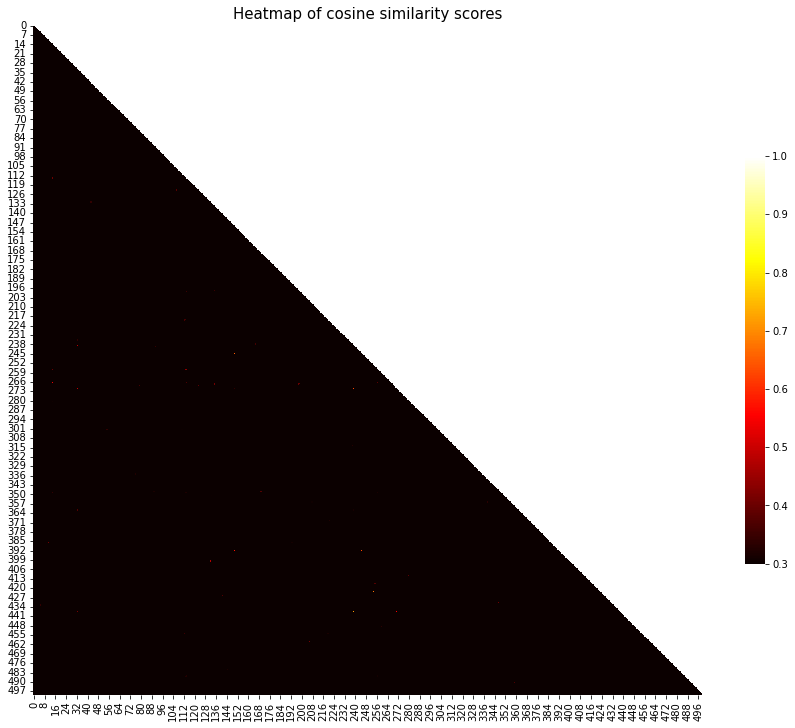

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

f, ax = plt.subplots(figsize=(15, 15))

A = tf_idf_cossim.flatten().reshape (500,500)

mask = np.zeros_like(A, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(A, mask=mask, square=True,  fmt='.2f', cbar_kws={"shrink": .5},
                 vmax=1.0, vmin=.3, cmap="hot")

ax.set_title("Heatmap of cosine similarity scores").set_fontsize(15)


ax.set_xlabel("")
ax.set_ylabel("")
plt.show()

En esta última sección,  vamos a presentar el algoritmo de clustering [K-Means](https://en.wikipedia.org/wiki/K-means_clustering), un algoritmo de clustering no supervisado que nos va a agrupar las diferentes cuestiones planteadas en Stack Overflow en diferentes grupos.


El objetivo de K-Means es sencillo: agrupar datos similares y descubrir patrones subyacentes. Para lograr esto, K-Means busca un número fijo $k$ de centroides en el dataset. Un centroide es el centro de un cluster y un cluster es una collección de datos reunidos que tienen ciertas similitudes entre ellos. El ‘means’ se refiere al promediado de los datos encontrando el centroide. El algoritmo es no supervisado pues no tiene conocimiento de los grupos en el dataset, es decir, encontrará los grupos subyacentes en el dataset.

Vamos a ver cómo funciona K-Means para los datos de tf-idf:

In [ ]:
from sklearn.cluster import KMeans

k = 5 
kmeans = KMeans(n_clusters=k).fit(tf_idf_df)


El algoritmo ha agrupado cada uno de los documentos en uno de los 5 cluster definidos:

In [ ]:
kmeans.labels_ 


array([2, 4, 2, 1, 4, 1, 4, 4, 1, 2, 3, 2, 4, 2, 3, 2, 2, 0, 3, 2, 2, 4,
       4, 0, 0, 0, 2, 1, 1, 2, 4, 2, 3, 0, 4, 3, 1, 2, 1, 1, 2, 1, 1, 0,
       0, 0, 1, 3, 0, 1, 2, 3, 4, 2, 2, 3, 4, 0, 0, 4, 2, 0, 1, 0, 4, 1,
       3, 2, 4, 4, 2, 0, 2, 4, 4, 2, 2, 2, 1, 4, 1, 0, 2, 3, 2, 0, 1, 4,
       0, 1, 0, 2, 1, 4, 2, 2, 3, 2, 2, 4, 1, 4, 0, 1, 3, 2, 0, 4, 2, 2,
       3, 3, 4, 2, 3, 0, 4, 3, 2, 2, 0, 0, 2, 4, 4, 1, 2, 4, 1, 4, 4, 3,
       4, 4, 2, 0, 1, 2, 1, 2, 2, 1, 2, 3, 4, 4, 2, 1, 2, 4, 0, 4, 2, 4,
       0, 2, 4, 2, 1, 1, 2, 4, 4, 3, 4, 1, 2, 2, 1, 2, 0, 2, 3, 2, 1, 4,
       1, 4, 4, 2, 4, 2, 2, 2, 2, 4, 1, 4, 2, 0, 4, 0, 1, 1, 2, 4, 4, 4,
       4, 3, 2, 2, 2, 2, 1, 4, 3, 1, 4, 4, 4, 2, 4, 4, 2, 1, 4, 2, 1, 2,
       2, 1, 1, 0, 3, 4, 2, 4, 2, 4, 4, 1, 0, 2, 1, 0, 1, 2, 2, 0, 1, 2,
       2, 3, 0, 0, 3, 1, 1, 1, 0, 2, 0, 4, 2, 2, 0, 3, 2, 1, 3, 0, 1, 4,
       0, 3, 2, 3, 1, 4, 2, 0, 1, 1, 2, 2, 3, 2, 2, 1, 0, 3, 1, 0, 0, 2,
       2, 2, 2, 4, 3, 1, 1, 4, 2, 2, 2, 2, 4, 2, 2,

Una cuestión importante es que el parámetro que indica el número de cluster $k$ hay que proporcionárselo y no sabemos, a priori, cuántos clúster podría haber subyacentes.

Para ello vamos a realizar el proceso con varios valores de $k$ para ver cuál es más adecuado:

In [ ]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = KMeans(n_clusters = k    #TODO
                        , init = 'k-means++'
                        , n_init = 10
                        , tol = 0.0001
                        , n_jobs = -1
                        , random_state = 1
                        , algorithm = 'full')

        kmeans_results [k] =  kmeans.fit(data)  # TODO : poner en un diccionario
    return kmeans_results

kmeans_results = kmeans_results = run_KMeans (12, tf_idf_df)
  

Para determinar cómo de cohesionado está un cluster en relación con los otros clusters existe una medida denominada silueta (silhouette) que nos indica precisamente esto:

In [ ]:
from sklearn.metrics import silhouette_score

def silhouette(kmeans_dict, df, plot=False):
    sil = dict()
    for k, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) 
        sil[k] = silhouette_avg # TODO: añadir a diccionario

    return sil

sil_results = silhouette ( kmeans_results, tf_idf_df )
print (sil_results)

# TODO: Qué valor de k obtiene el mejor valor de silueta 
best_k = max_key = max(sil_results, key=lambda k: sil_results[k])
print (best_k)

{2: 0.0032730177158455595, 3: 0.002902984071116774, 4: 0.003621060643069802, 5: 0.0036018855970472007, 6: 0.003974979631252113, 7: 0.0038818813118547883, 8: 0.0034970916155474983, 9: 0.003944421014168287, 10: 0.0044270112705147024, 11: 0.004613199057722221, 12: 0.0042747812590224945}
11


Una vez obtenido el valor de cluster que mejor podría describir la agrupación de los datos, vamos a hacer una predicción sobre los datos con la función `fit_predict` con el objeto kmeans que corresponde a `best_k`:

In [ ]:
prediction =  kmeans_results[best_k].fit_predict(tf_idf_df) # TODO

In [ ]:
stackoverflow_df['cluster'] = prediction # TODO: añadir las predicciones a stackoverflow_df

stackoverflow_df.head(5)

,id,title,body,accepted_answer_id,answer_count,comment_count,creation_date,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,post_type_id,score,tags,view_count,favorite_count,text,mtext,keywords,cluster
0,3247246,Integrate War-Plugin for m2eclipse into Eclips...,<p>I set up a small web project with JSF and M...,3247526.0,2,0,2010-07-14 14:39:48.053 UTC,2010-07-14 16:02:19.683 UTC,2010-07-14 15:56:37.803 UTC,,70604.0,,389430.0,1,2,eclipse|maven-2|tomcat|m2eclipse,1653,NaN,Integrate War-Plugin for m2eclipse into Eclips...,integrate war plugin meclipse eclipse project ...,"{'eclipse': 0.364, 'integrate': 0.322, 'meclip...",8
1,40270764,phantomjs-node page.evaulate seems to hang,<p>I have an implementation of 'waitfor' with ...,NaN,1,0,2016-10-26 19:35:00.537 UTC,2016-11-02 20:05:09.143 UTC,NaN,,NaN,,245076.0,1,0,node.js|phantomjs,35,NaN,phantomjs-node page.evaulate seems to hang<p>I...,phantomjs node page evaulate seems hang implem...,"{'sitepage': 0.445, 'evaluate': 0.348, 'conten...",8
2,27532383,Dynamic operations can only be performed in ho...,<p>I'm working with an API that requires:</p>\...,NaN,1,0,2014-12-17 18:31:18.6 UTC,2014-12-17 19:57:43.443 UTC,NaN,,NaN,,3105880.0,1,1,c#|asp.net-mvc,4372,NaN,Dynamic operations can only be performed in ho...,dynamic operations performed homogenous appdom...,"{'legacycasmodel': 0.458, 'dynamic': 0.345, 'a...",6
3,33511888,CSS with relative URL to background image?,<p>I have a file structure of:</p>\n\n<pre><co...,NaN,2,2,2015-11-04 00:50:35.223 UTC,2015-11-04 01:51:03.037 UTC,2015-11-04 01:51:03.037 UTC,,5464492.0,,5464492.0,1,0,css|background-image,406,NaN,CSS with relative URL to background image?<p>I...,css relative url background image file structu...,"{'damask': 0.476, 'background': 0.379, 'image'...",4
4,46160163,Share canvas image on android,<p>Hello so I write a small game where in the ...,46160246.0,1,0,2017-09-11 16:19:18.32 UTC,2017-09-11 16:24:12.69 UTC,NaN,,NaN,,8570512.0,1,0,android|canvas|bitmap|share,52,NaN,Share canvas image on android<p>Hello so I wri...,share canvas image android hello write small g...,"{'uri': 0.358, 'bitmap': 0.283, 'share': 0.266...",4


Una vez definidos los clusters, vamos a ver cuáles son las palabras clave que definen cada uno de los clusters:

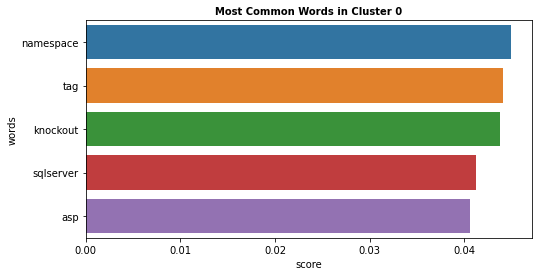

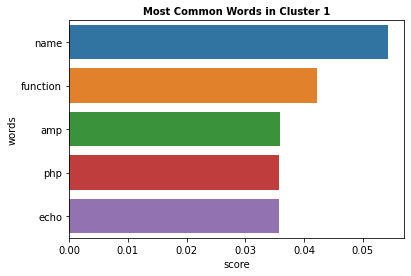

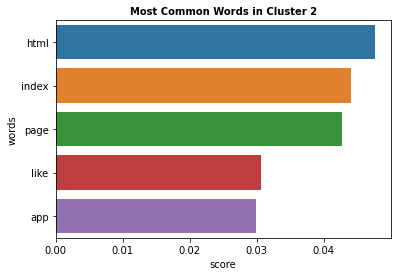

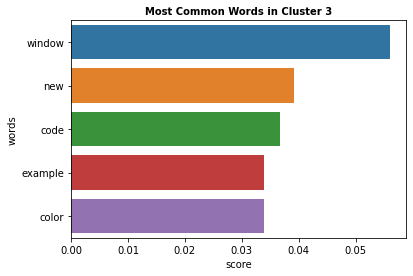

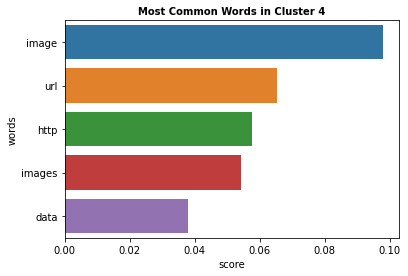

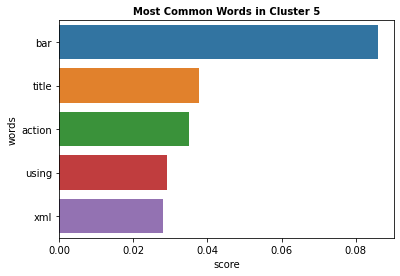

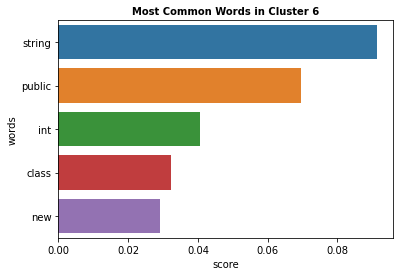

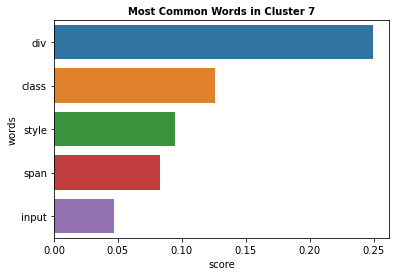

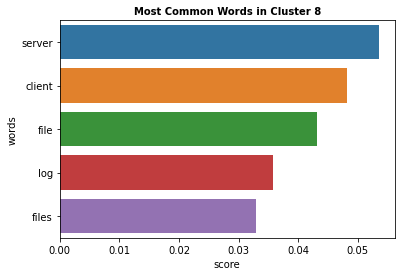

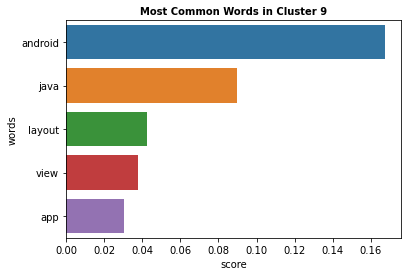

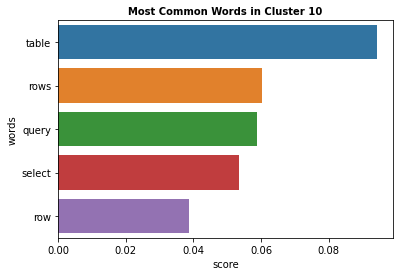

In [ ]:
# Definir un par de funciones auxiliares

def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # 
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # 
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # 
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['words', 'score'])
        dfs.append(df)
    return dfs


def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'words', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

n_feats = 5 # Num. palabras a representar
dfs = get_top_features_cluster(tf_idf_df.to_numpy(), prediction, n_feats)
plotWords(dfs, n_feats)  # 

**¿En qué cluster se encuentran las preguntas relativas a Android?** 

**¿De qué tratan los post/preguntas/documentos que se encuentran en el cluster 7?**

---


# Parte 3. Declaración Universal de los Derechos Humanos

La [Declaración Universal de los Derechos Humanos](https://en.wikipedia.org/wiki/Universal_Declaration_of_Human_Rights) es un documento adoptado por la Asamblea General de las Naciones Unidas en su Resolución 217 A (III), el 10 de diciembre de 1948 en París, ​ que recoge en sus 30 artículos los derechos humanos considerados básicos.

In [2]:
nltk.download('udhr')
  
from nltk.corpus import udhr

[nltk_data] Downloading package udhr to /root/nltk_data...
[nltk_data]   Unzipping corpora/udhr.zip.


Una vez importado el contenido, para ver los idiomas en los que se encuentran disponible:


In [3]:
udhr.fileids()[:10]


['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1']

Vamos a seleccionar 5 idiomas para recopilar estadísticas: 4 vienen prefijados y 1 será de tu elección

In [26]:
langs = ['English-Latin1', 'Spanish_Espanol-Latin1', 'French_Francais-Latin1',
         'Catalan_Catala-Latin1', 'Galician_Galego-Latin1'] #TODO

Crear un Dataframe con los siguientes datos de cada idioma:

- Número de palabras en la Declaración Universal de Derecho Humanos (UDHR, en inglés)

- Número de palabras únicas

- Longitud media de las palabras

- Número de sentencias incluidas

- Número medio de palabras por sentencia


In [27]:
def generate_udhr_stats():
  
  np_udhr=[]
  columns=['Language', 'WordCount','WordCountUnique',
           'NumberSentences','MeanWordLength','MeanWordsPerSentence']
          

  for lang in langs:
    text = udhr.raw (lang)
    n_char = len( text )              # TODO
    n_words = len(udhr.words(lang))   # TODO
    n_sents = len(udhr.sents(lang))   # TODO
    n_unique = len (set(udhr.words(lang))) # TODO
    mean_word_length = round(n_char/n_words ,2 ) # TODO
    mean_n_words_sents = round(n_words/n_sents , 2) # TODO
    
    np_udhr.append( [lang, n_words, n_unique, n_sents,             # TODO
                    mean_word_length, mean_n_words_sents] ) 

  return pd.DataFrame(np_udhr, columns=columns) # TODO

udhr_df = generate_udhr_stats()

In [28]:
udhr_df.head(5)

,Language,WordCount,WordCountUnique,NumberSentences,MeanWordLength,MeanWordsPerSentence
0,English-Latin1,1781,533,67,5.61,26.58
1,Spanish_Espanol-Latin1,1763,542,58,5.67,30.40
2,French_Francais-Latin1,1935,567,57,5.17,33.95
3,Catalan_Catala-Latin1,1992,564,84,5.02,23.71
4,Galician_Galego-Latin1,1831,581,108,5.46,16.95


¿Cuál es la ***diversidad léxica*** (relación del número de palabras distintas entre el número total de palabras) en cada idioma? 

In [29]:
def lexical_diversity (row):
  return row.WordCountUnique / row.WordCount # TODO

udhr_df['LD'] = udhr_df.apply ( lambda row : lexical_diversity ( row ), axis=1) # TODO

In [30]:
udhr_df

,Language,WordCount,WordCountUnique,NumberSentences,MeanWordLength,MeanWordsPerSentence,LD
0,English-Latin1,1781,533,67,5.61,26.58,0.299270
1,Spanish_Espanol-Latin1,1763,542,58,5.67,30.40,0.307431
2,French_Francais-Latin1,1935,567,57,5.17,33.95,0.293023
3,Catalan_Catala-Latin1,1992,564,84,5.02,23.71,0.283133
4,Galician_Galego-Latin1,1831,581,108,5.46,16.95,0.317313


---


La **ley Zipf** debe su nombre al lingüista norteamericano George Kingsley Zipf y dictamina que un pequeño número de palabras se utilizan todo el tiempo mientras que una gran mayoría de ellas apenas se utiliza. No es muy sorprendente que palabras muy frecuentes en textos en inglés sean `the`, `of` y similares, y que palabras como `intrauterine` apenas se utilicen. [https://en.wikipedia.org/wiki/Zipf%27s_law]

La ley Zipf puede escribirse de la siguiente forma: la $r$-ésima palabra más frecuente $f(r)$ escala según la fórmula: $f(r) \propto \frac{1}{r^{\alpha}}$ con $\alpha \approx 1$.


In [31]:
import operator
from nltk.probability import FreqDist

text = udhr.raw(langs[4])
token_dict = FreqDist(  tokenize_and_remove_punctuations (text) )
sorted_token_dict = sorted(token_dict.items(), key=operator.itemgetter(1))
sorted_token_list = sorted_token_dict[-50:]
sorted_token_list.reverse()

sorted_token_list


[('a', 87),
 ('e', 82),
 ('de', 64),
 ('dereito', 39),
 ('o', 35),
 ('persoa', 33),
 ('da', 33),
 ('ten', 28),
 ('artigo', 27),
 ('ª', 26),
 ('á', 25),
 ('toda', 24),
 ('ou', 23),
 ('súa', 22),
 ('que', 20),
 ('en', 17),
 ('do', 17),
 ('dereitos', 17),
 ('os', 16),
 ('por', 16),
 ('se', 13),
 ('liberdade', 11),
 ('dos', 11),
 ('ó', 10),
 ('unha', 9),
 ('ser', 9),
 ('para', 9),
 ('no', 9),
 ('será', 8),
 ('ninguín', 8),
 ('calquera', 8),
 ('contra', 8),
 ('como', 8),
 ('protección', 7),
 ('país', 7),
 ('nacións', 7),
 ('non', 7),
 ('teñen', 7),
 ('das', 7),
 ('matrimonio', 6),
 ('igual', 6),
 ('seu', 6),
 ('ós', 6),
 ('familia', 6),
 ('traballo', 5),
 ('seus', 5),
 ('lei', 5),
 ('nin', 5),
 ('relixión', 5),
 ('sen', 5)]

In [32]:
def createZipfTable(freqs):
  zipf_table = []
  top_frequency = freqs[0][1]  # TODO

  for index, item in enumerate(freqs , start=1):
    relative_frequency = "1/{}".format(index)
    zipf_frequency = top_frequency * (1 / index)
    zipf_table.append({"word": item[0], "actual_frequency": item[1], "relative_frequency": relative_frequency , "zipf_frequency": zipf_frequency })

  return zipf_table


zipf_table = createZipfTable (sorted_token_list)


print("|Rank|    Word    |       Freq | Zipf Frac  | Zipf Freq  |")
format_string = "|{:4}|{:12}|{:12.0f}|{:>12}|{:12.2f}|"
for index, item in enumerate(zipf_table,start=1):
        print(format_string.format(index,
                                   item["word"],
                                   item["actual_frequency"],
                                   item["relative_frequency"],
                                   item["zipf_frequency"]))

|Rank|    Word    |       Freq | Zipf Frac  | Zipf Freq  |
|   1|a           |          87|         1/1|       87.00|
|   2|e           |          82|         1/2|       43.50|
|   3|de          |          64|         1/3|       29.00|
|   4|dereito     |          39|         1/4|       21.75|
|   5|o           |          35|         1/5|       17.40|
|   6|persoa      |          33|         1/6|       14.50|
|   7|da          |          33|         1/7|       12.43|
|   8|ten         |          28|         1/8|       10.88|
|   9|artigo      |          27|         1/9|        9.67|
|  10|ª           |          26|        1/10|        8.70|
|  11|á           |          25|        1/11|        7.91|
|  12|toda        |          24|        1/12|        7.25|
|  13|ou          |          23|        1/13|        6.69|
|  14|súa         |          22|        1/14|        6.21|
|  15|que         |          20|        1/15|        5.80|
|  16|en          |          17|        1/16|        5.4

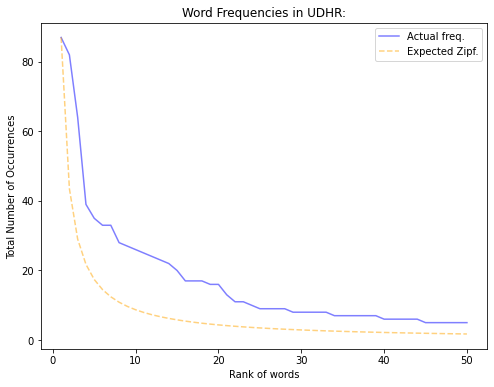

In [33]:
import numpy as np
import matplotlib.pyplot as plt



ranks = list (range ( 1, 1+len (zipf_table) ))
frequencies = [ rec['actual_frequency']  for rec in zipf_table ]
zipf_frequencies = [ rec['zipf_frequency'] for rec in zipf_table ] 

plt.figure(figsize=(8,6))

plt.title("Word Frequencies in UDHR:")
plt.ylabel("Total Number of Occurrences")
plt.xlabel("Rank of words")

plt.plot(
    ranks,
    frequencies, color='blue', label='Actual freq.',
    alpha=0.5
  )


plt.plot(
    ranks,
    zipf_frequencies, color="orange", label='Expected Zipf.',linestyle='--',
    alpha=0.5
  )

plt.legend()

**Comparar si los diferentes idiomas elegidos siguen la ley Zipf o divergen de ella.**